In [2]:
import folium
import pandas as pd

4


In [3]:
def plot_beijing_scatter(trajectory):
    m = folium.Map(location=[39.9, 116.4], zoom_start=9, tiles="cartodb positron")
    for daily_record in trajectory:
        for (latitude, longitude) in daily_record:
            folium.Marker((latitude, longitude)).add_to(m)
    m.save("beijing_scatter.html")
def plot_beijing_line(trajectory):
    m = folium.Map(location=[39.9, 116.4], zoom_start=9, tiles="cartodb positron")
    colors = ['gray', 'black', 'lightred', 'cadetblue', 'red', 'darkblue', 'green', 'lightblue', 'beige', 'blue', 'lightgreen', 'white', 'orange', 'darkgreen', 'purple', 'darkred', 'pink', 'darkpurple', 'lightgray']
    for day in range(len(trajectory)):
        line = []
        for location in range(len(trajectory[day])):
            popup = f"Time {day+1} - {location+1}"
            loc = f"{location+1}"
            line.append(trajectory[day][location][0:2])
            folium.Marker(location=trajectory[day][location][0:2],
                         tooltip=popup,
                         icon=folium.Icon(icon=loc, prefix='fa', color=colors[day])
                         ).add_to(m)
            
        folium.PolyLine(line, color="red", weight=2.5, opacity=1).add_to(m)
    m.save("beijing_line.html")

In [5]:
df = pd.read_csv('expected_G.csv')
actual_df = pd.read_csv('actual_G.csv')
# 3,26
# 17,1
# 41,11
user = 17

traj_df = df[df['uid'] == user]
truth_df = actual_df[actual_df['uid'] == user]

i = 1
# prev points
traj = []
for i in range(i,i+3):
    coor = (truth_df.iloc[i]['lat'], truth_df.iloc[i]['long'])
    traj.append(coor)
# prediction
coor_p = (traj_df.iloc[i+3]['lat'], traj_df.iloc[i+3]['long'])
# actual 
coor_a = (truth_df.iloc[i+3]['lat'], truth_df.iloc[i+3]['long'])
print(coor_a)
print(coor_p)
print(traj)

m = folium.Map(location=[39.9, 116.4], zoom_start=9, tiles="cartodb positron")
line = []
for location in range(len(traj)):
    popup = f"{location+1}"
    loc = f"{location+1}"
    line.append(traj[location][0:2])
    folium.Marker(location=traj[location][0:2],
                tooltip=popup,
                icon=folium.Icon(icon=loc, prefix='fa', color='blue')
                ).add_to(m)
folium.Marker(location=coor_p[0:2],
        tooltip=popup,
        icon=folium.Icon(icon='4', prefix='fa', color='red')
        ).add_to(m)
folium.Marker(location=coor_a[0:2],
        tooltip=popup,
        icon=folium.Icon(icon='4', prefix='fa', color='blue')
        ).add_to(m)
folium.PolyLine(line, color="red", weight=2.5, opacity=1).add_to(m)
m.save("drawing2.html")

(39.95233262165464, 116.41261043400888)
(39.96799273251244, 116.3995224946293)
[(39.97335427629095, 116.39144444289283), (39.96914994536369, 116.39567764111604), (39.96494561443642, 116.39991083933926)]


In [22]:
df = pd.read_csv('expected_G.csv')
actual_df = pd.read_csv('actual_G.csv')
# 3,26
# 17,1
# 41,11
user = 41

traj_df = df[df['uid'] == user]
truth_df = actual_df[actual_df['uid'] == user]

i = 0
# prev points
traj_truth = []
for i in range(48):
    coor = (truth_df.iloc[i]['lat'], truth_df.iloc[i]['long'])
    traj_truth.append(coor)

traj_pred = []
for i in range(48):
    coor = (traj_df.iloc[i]['lat'], traj_df.iloc[i]['long'])
    traj_pred.append(coor)

m = folium.Map(location=[39.9, 116.4], zoom_start=9, tiles="cartodb positron")
line = []
for location in range(len(traj_pred)):
    popup = f"{location+1}"
    loc = f"{location+1}"
    line.append(traj_pred[location][0:2])
    folium.Marker(location=traj_pred[location][0:2],
                tooltip=popup,
                icon=folium.Icon(icon=loc, prefix='fa', color='red')
                ).add_to(m)
folium.PolyLine(line, color="red", weight=2.5, opacity=1).add_to(m)
m.save("drawing_predicted.html")

#m = folium.Map(location=[39.9, 116.4], zoom_start=9, tiles="cartodb positron")
line = []
for location in range(len(traj_truth)):
    popup = f"{location+1}"
    loc = f"{location+1}"
    line.append(traj_truth[location][0:2])
    folium.Marker(location=traj_truth[location][0:2],
                tooltip=popup,
                icon=folium.Icon(icon=loc, prefix='fa', color='blue')
                ).add_to(m)

folium.PolyLine(line, color="blue", weight=2.5, opacity=1).add_to(m)
m.save("drawing_truth.html")

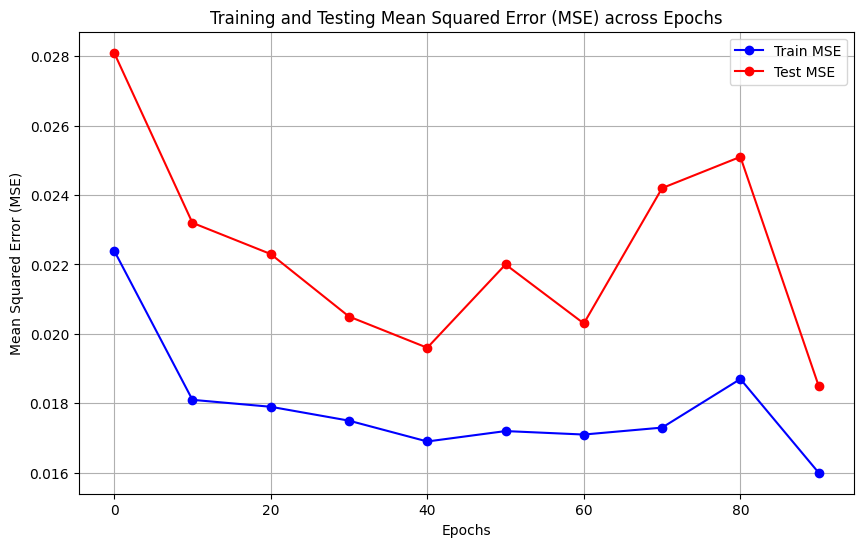

In [23]:
import matplotlib.pyplot as plt

# Define the epoch numbers
epochs = range(0, 100, 10)

# Define the train and test MSE values
train_mse = [0.0224, 0.0181, 0.0179, 0.0175, 0.0169, 0.0172, 0.0171, 0.0173, 0.0187, 0.0160]
test_mse = [0.0281, 0.0232, 0.0223, 0.0205, 0.0196, 0.0220, 0.0203, 0.0242, 0.0251, 0.0185]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, marker='o', linestyle='-', color='b', label='Train MSE')
plt.plot(epochs, test_mse, marker='o', linestyle='-', color='r', label='Test MSE')
plt.title('Training and Testing Mean Squared Error (MSE) across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()